# Episode 3: Your First Model (Digits Recognizer)

This notebook accompanies Episode 3 of the SWE-to-MLE series.
We will build a system to recognize handwritten digits.

## 1. The Setup
Importing the standard library of ML: Scikit-Learn.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


## 2. The Data
Loading the MNIST (Digits) dataset.

In [2]:
# Load the dataset
digits = datasets.load_digits()

# X = The features (pixel data)
# y = The labels (the number 0-9)
X, y = digits.data, digits.target

print(f"Dataset Shape: {X.shape}")
print(f"We have {X.shape[0]} images, each with {X.shape[1]} pixels (8x8 grid).")

Dataset Shape: (1797, 64)
We have 1797 images, each with 64 pixels (8x8 grid).


### Let's see the examples!
You can't code blindly. Let's look at what the computer sees.

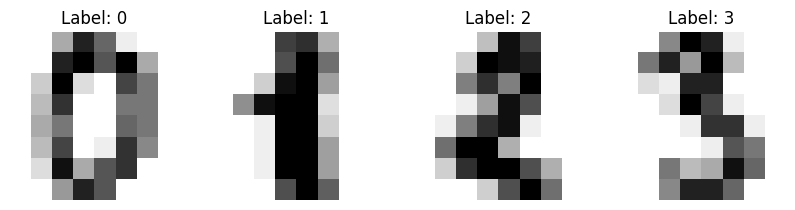

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

## 3. The Split
Separate training data (study guide) from test data (final exam).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training examples: {len(X_train)}")
print(f"Test examples: {len(X_test)}")

Training examples: 1437
Test examples: 360


## 4. The Model (Training)
We use K-Nearest Neighbors.

In [5]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 5. Prediction & Evaluation

In [6]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 98.33%


### Sanity Check
Let's visualize a few predictions to see where it succeeds (or fails).

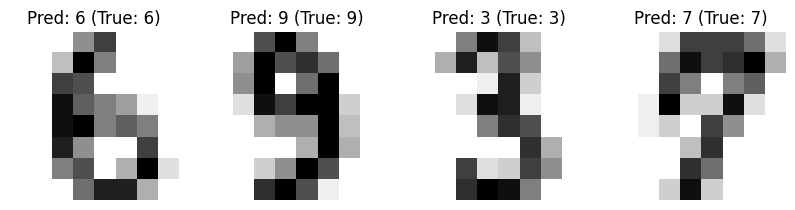

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, true_label in zip(axes, X_test[:4].reshape(-1, 8, 8), predictions[:4], y_test[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction} (True: {true_label})")